In [1]:
# Import configuration
from src.sim import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

[{'N': 1, 'T': range(0, 100), 'M': {'MARKETING_STEADY': 500, 'MARKETING_SHOCK_MAG': 1234, 'MARKETING_SHOCK_FREQ': 2, 'EXO_EXPERIENCE': 140, 'SOURCE_POOL': 100000, 'THRESHOLD': 20, 'LEAK_COEFFICIENT': 0.025}}]


In [2]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x0000024EFB811080>]
Configurations: [<cadCAD.configuration.Configuration object at 0x0000024EFB811080>]


In [3]:
print(experiments.dataset[0].head())

   timestamp  signal                                           adoption state  \
0 2020-01-01       0  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
2 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
4 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
6 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   
8 2020-01-01     500  <class 'src.sim.model.utils.Adoption'>: {'repu...    []   

                                                pool  run  substep  timestep  
0  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1        0         0  
2  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1        2         1  
4  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1        2         2  
6  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1        2         3  
8  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1        2         4  


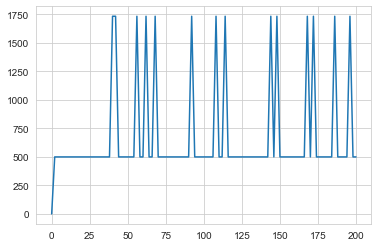

In [4]:
plt.plot(experiments.dataset[0].signal)

In [5]:
experiments.dataset[0].adoption[100].reputation

50

In [6]:
first_experiment = experiments.dataset[0]

In [7]:
len(first_experiment)

101

In [8]:
print(first_experiment.adoption[0])

<class 'src.sim.model.utils.Adoption'>: {'reputation': None, 'state': 'unaware'}


In [9]:
print(first_experiment.adoption[2])

<class 'src.sim.model.utils.Adoption'>: {'reputation': 1, 'state': 'adopted', 'threshold': 20}


In [10]:
print(first_experiment.adoption[4])

<class 'src.sim.model.utils.Adoption'>: {'reputation': 2, 'state': 'loyal', 'threshold': 20}


In [11]:
print(first_experiment.pool[6])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 89341.14918212891, 'reputation': 2.852484375, 'drip': 0}, 'aware': {'pool': 10658.850817871094, 'reputation': 0.14382773437500002, 'neg_drip': 0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}}, 'threshold': 0.5}


In [12]:
# for evens in range(len(experiment)):
#     index = evens * 2
#     print(experiment.adoption[index].reputation)
#     print(experiment.adoption[index].state)

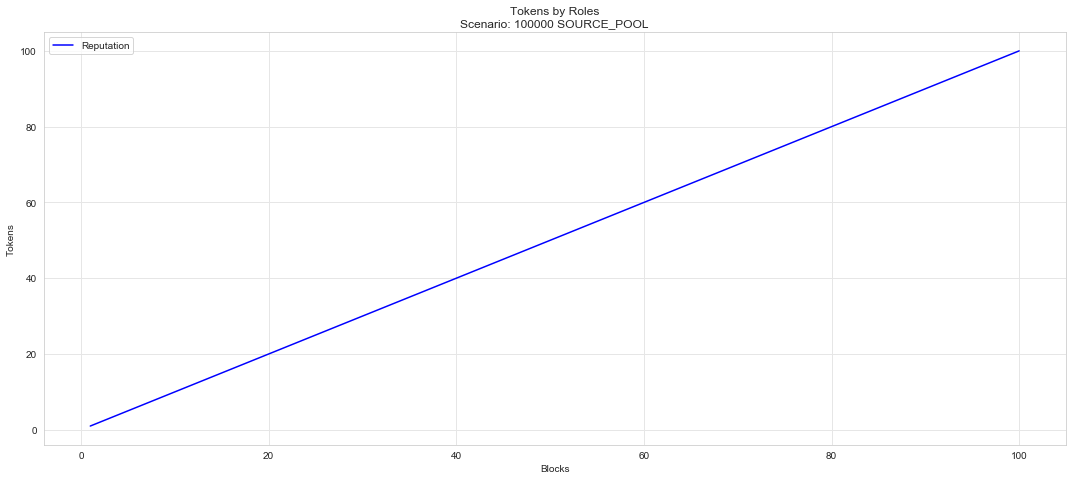

In [13]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['rep_count'] = df.adoption.apply(lambda x: np.array(x.reputation))
        df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Tokens by Roles' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['rep_count'],color = colors[0], label='Reputation')

        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

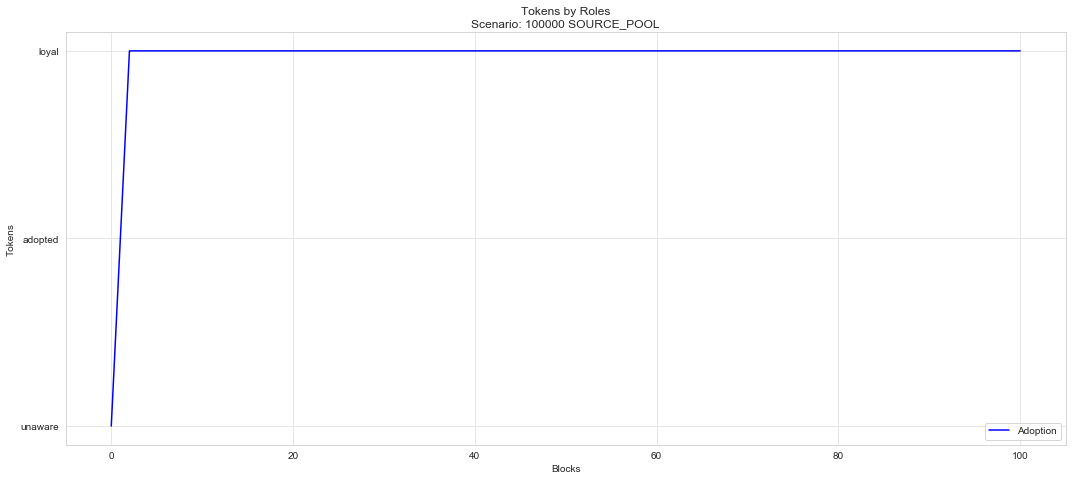

In [14]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['rep_count'] = df.adoption.apply(lambda x: np.array(x.reputation))
        df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Tokens by Roles' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['adopt_state'],color = colors[0], label='Adoption')

        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

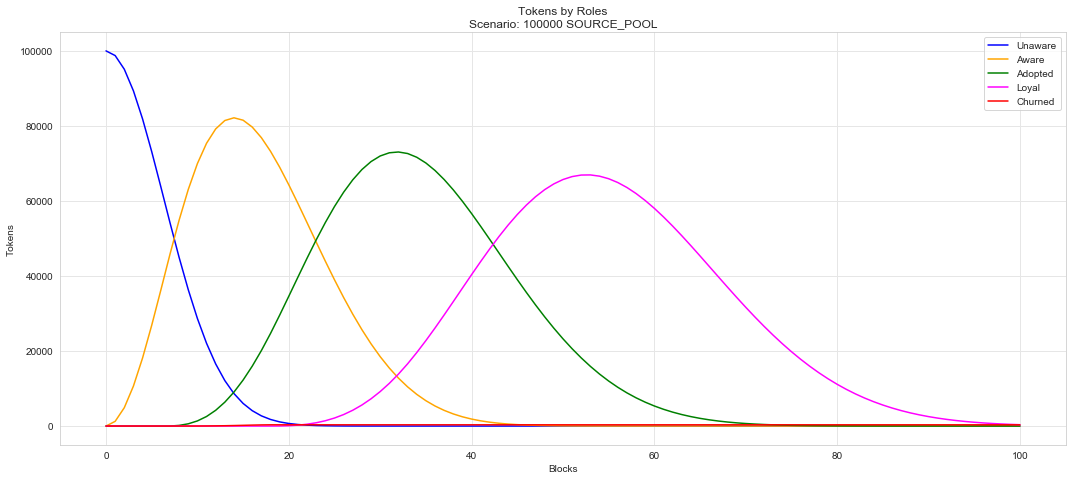

In [15]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
#         for key, value in df.pool.items(): #state.items():
#             print('key',key,'value',value)
#             for keys, values in value.items(): #state.items():
#                 print('keys',keys,'values',values)

        df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['pool']))
        df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['pool']))
        df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['pool']))
        df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['pool']))
        df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['pool']))

    
    
#             print(df[key])
#         df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Tokens by Roles' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
        ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
        ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
        ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
        ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')


        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

### State Transition Table

| Current State    |  Input | Next State     |  Threshold | Output Reputation  |Output Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|:-----:|
|Unaware |Marketing Signal     |Unaware    | Not Exceeded | Empty $\emptyset$      |None      |
|Unaware |Marketing Signal     |Aware    | Exceeded | Exists $\exists$     | None      |
|Aware    | Reputation    |Aware    | Not Exceeded | Exists $\exists$       |None      |
|Aware    | Reputation    |Adopted    | Exceeded | Positive (+)     |None      |
|Adopted    | Experience    |Adopted    | Not Exceeded | Positive (+)      |Some      |
|Adopted    | Experience    |Loyal    | Exceeded | Positive  (+)      |Increased      |
|Adopted    | Experience    |Churned    | Lower Limit Exceeded | Negative  (-)    | Decreased      |
|Loyal    | Experience    |Loyal    | Exceeded | Positive (++)     | Increased      |
|Loyal    | Experience    |Adopted    | Lower Limit Exceeded | Positive (+)      | Decreased      |
|Churned    | Reputation    |Churned    | Lower Limit Exceeded | Negative (-)      | None      |
|Churned    | Reputation    |Adopted    |  Exceeded | Positive (+)      | None     |



#### Drip Function
$$ \Delta{V} = \delta \cdot (V_C \times \mu_C -  V_C  \times \mu_{\tau}) $$

#### Current State
$$ V_C = V_C - \Delta{V} $$
$$ \mu_C =  \mu_C - \delta \cdot \mu_C $$

#### Next State
$$ V_N = V_N + \Delta{V} $$

In [16]:
class Adoption_Pool(): #args
    """
    Adoption class for defining state of network adoption
    This is class is on the subpopulation level, where each state maitains a count of members
    and a mean of reputation in the addoption funnel
    and threshold transition value
    """  
    def __init__(self, pool):
        """
        Adoption class initialized without a preset reputation
        Unaware state
        """        

        self.state = {'unaware': {'pool': pool, 'reputation': None,},
                      'aware': {'pool': 0, 'reputation': 0},
                      'adopted': {'pool': 0, 'reputation': 0},
                      'loyal': {'pool': 0, 'reputation': 0},
                      'churned': {'pool': 0, 'reputation': 0},
                    }
        # self.state.pool = pool
        # self.pool = pool
        # self.reputation = None
        self.threshold = 0.5

 # when signal reaches above filtered threshold       
    def apply_signal(self, signal):
        """
        Apply signal to reputation metric
        FILTER HERE OR BEFORE
        """  
        print(self.state['unaware'])
        if self.state['unaware']['reputation'] is None:
            self.state['unaware']['reputation'] = 0

        if signal == 0: 
            self.state['unaware']['reputation']  =  0
        elif signal > 0: 
            self.state['unaware']['reputation'] +=  1

        elif signal < 0: 
            self.state['unaware']['reputation'] -=  1
        
            
        
    def apply_experience(self, experience):
        """
        Apply experience to reputation metric
        """  
        if experience > 0: 
            self.reputation +=  1
        
        if experience < 0: 
            self.reputation -=  1
            
    
    def calculate_drip(self, delta):
        """
        Calculate drip for each state
        """  
        for key, value in self.state.items():
            if value['reputation'] is not None:
    #                 if key is 'unaware':
                if value['reputation'] > self.threshold:
            # NOT THRESHOLD BUT THRESHOLD*POOL
                    value['drip'] = delta * (value['reputation'] * value['pool'] - self.threshold * value['pool'])
                    value['reputation'] -= delta * value['reputation']

#     #                 if key is 'aware':
#                 if value['reputation'] > self.threshold:
#             # NOT THRESHOLD BUT THRESHOLD*POOL
#                     value['drip'] = delta * (value['reputation'] * value['pool'] - self.threshold * value['pool'])
#                     value['reputation'] -= delta * value['reputation']

#     #                 if key is 'adopted':
#                 if value['reputation'] > self.threshold:
#             # NOT THRESHOLD BUT THRESHOLD*POOL
#                     value['drip'] = delta * (value['reputation'] * value['pool'] - self.threshold * value['pool'])
#                     value['reputation'] -= delta * value['reputation']

                if value['reputation'] < self.threshold:
            # NOT THRESHOLD BUT THRESHOLD*POOL
                    value['neg_drip'] = - delta * (value['reputation'] * value['pool'] - self.threshold * value['pool'])
#                     value['reputation'] += delta * value['reputation']
        

    def update_pools(self, delta):
        """
        Update pool from drip for each state
        """  
        for key, value in self.state.items():
            print(key)
            if 'drip' in value.keys():
                value['pool'] -= value['drip']
                
                # MUST USE == , NOT is in CADCAD
                if key == 'unaware':
                    print('triggered 2')
                    self.state['aware']['pool'] += value['drip']
                    self.state['aware']['reputation'] += delta * value['reputation']

                
                elif key == 'aware':
                    self.state['adopted']['pool'] += value['drip']
                    self.state['adopted']['reputation'] += delta * value['reputation']
                    
                elif key == 'adopted':
                    self.state['loyal']['pool'] += value['drip']
                    self.state['loyal']['reputation'] += delta * value['reputation']

                
#                 elif key is 'adopted': # AND NEGATIVE FLAG FOR NEGATIVE
#                     self.state['churned']['pool'] += value['drip']
#                     self.state['adopted']['reputation'] += delta * value['reputation']

                    
#                 elif key is 'loyal':
#                     self.state['adopted']['pool'] += value['drip']
                    
                elif key == 'churned':
                    self.state['adopted']['pool'] += value['drip']
                    self.state['adopted']['reputation'] += delta * value['reputation']

                
                
                value['drip'] = 0
                
            if 'neg_drip' in value.keys():
                
                                  
                if key == 'adopted':
                    self.state['churned']['pool'] += value['neg_drip']
                    self.state['churned']['reputation'] -= delta * value['reputation']
                    value['pool'] -= value['neg_drip']
                
                elif key == 'loyal': # AND NEGATIVE FLAG FOR NEGATIVE
                    self.state['adopted']['pool'] += value['neg_drip']
                    self.state['adopted']['reputation'] -= delta * value['reputation']
                    value['pool'] -= value['neg_drip']

                    
                    
#                 elif key is 'loyal':
#                     self.state['adopted']['pool'] += value['drip']
                    
#                 elif key is 'churned':
#                     self.state['adopted']['pool'] += value['drip']
                
                value['neg_drip'] = 0
                

    
    def determine_state(self, reputation=None, threshold= None):
        """
        Uses reputation and threshold to determine state
        """  
        if threshold is None:
            threshold = self.threshold
            
        if reputation is None:
            reputation = self.reputation
        
        if reputation > threshold:
            if self.state == 'aware':
                self.state = 'adopted'
                
            elif self.state == 'adopted':
                self.state = 'loyal'
                       
                
        if reputation < threshold:
            if self.state == 'adopted':
                self.state = 'churned'
        
            elif self.state == 'loyal':
                self.state = 'adopted'
                
    def set_threshold(self, default_threshold=0.5, ext_threshold=None):
        """
        Set threshold to current state
        """  

        if self.state == 'unaware':
            if ext_threshold is not None:
                self.threshold = ext_threshold
            else:
                self.threshold = default_threshold
                
        elif self.state == 'aware':
            if ext_threshold is not None:
                self.threshold = ext_threshold
            else:
                self.threshold = default_threshold
                       
        elif self.state == 'adopted':
            if ext_threshold is not None:
                self.threshold = ext_threshold
            else:
                self.threshold = default_threshold
                
        elif self.state == 'loyal':
            if ext_threshold is not None:
                self.threshold = ext_threshold
            else:
                self.threshold = default_threshold       
                
        elif self.state == 'churned':
            if ext_threshold is not None:
                self.threshold = ext_threshold
            else:
                self.threshold = default_threshold
        
    def __str__(self):
        """
        Print all attributes of an event
        """
        return str(self.__class__) + ": " + str(self.__dict__)

In [17]:
pool = Adoption_Pool(10000)

In [18]:
print(pool)

<class '__main__.Adoption_Pool'>: {'state': {'unaware': {'pool': 10000, 'reputation': None}, 'aware': {'pool': 0, 'reputation': 0}, 'adopted': {'pool': 0, 'reputation': 0}, 'loyal': {'pool': 0, 'reputation': 0}, 'churned': {'pool': 0, 'reputation': 0}}, 'threshold': 0.5}


In [19]:
pool.state

{'unaware': {'pool': 10000, 'reputation': None},
 'aware': {'pool': 0, 'reputation': 0},
 'adopted': {'pool': 0, 'reputation': 0},
 'loyal': {'pool': 0, 'reputation': 0},
 'churned': {'pool': 0, 'reputation': 0}}

In [20]:
pool.state['unaware']

{'pool': 10000, 'reputation': None}

In [21]:
pool.state['unaware']['pool']

10000

In [22]:
pool.apply_signal(500)

{'pool': 10000, 'reputation': None}


In [23]:
print(pool)

<class '__main__.Adoption_Pool'>: {'state': {'unaware': {'pool': 10000, 'reputation': 1}, 'aware': {'pool': 0, 'reputation': 0}, 'adopted': {'pool': 0, 'reputation': 0}, 'loyal': {'pool': 0, 'reputation': 0}, 'churned': {'pool': 0, 'reputation': 0}}, 'threshold': 0.5}


In [24]:
pool.calculate_drip(0.1)

In [25]:
pool.update_pools(0.1)

unaware
triggered 2
aware
adopted
loyal
churned


In [26]:
print(pool)

<class '__main__.Adoption_Pool'>: {'state': {'unaware': {'pool': 9500.0, 'reputation': 0.9, 'drip': 0}, 'aware': {'pool': 500.0, 'reputation': 0.09000000000000001, 'neg_drip': 0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}}, 'threshold': 0.5}


In [27]:
print(pool)

<class '__main__.Adoption_Pool'>: {'state': {'unaware': {'pool': 9500.0, 'reputation': 0.9, 'drip': 0}, 'aware': {'pool': 500.0, 'reputation': 0.09000000000000001, 'neg_drip': 0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}}, 'threshold': 0.5}
